<a href="https://colab.research.google.com/github/ashutosh817/Dog-vs-Cat-Classification/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:29<00:00, 29.5MB/s]
100% 812M/812M [00:29<00:00, 28.5MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.12309.jpg', 'dog.12490.jpg', 'dog.7546.jpg', 'dog.932.jpg', 'dog.6804.jpg', 'cat.728.jpg', 'dog.5137.jpg', 'cat.12049.jpg', 'cat.2677.jpg', 'cat.10049.jpg', 'dog.131.jpg', 'dog.10766.jpg', 'cat.5609.jpg', 'cat.5529.jpg', 'cat.3607.jpg', 'cat.3556.jpg', 'cat.7588.jpg', 'cat.6519.jpg', 'cat.77.jpg', 'dog.9929.jpg', 'dog.6237.jpg', 'dog.1678.jpg', 'dog.9024.jpg', 'dog.5518.jpg', 'dog.3577.jpg', 'dog.7580.jpg', 'cat.12146.jpg', 'cat.9735.jpg', 'dog.3056.jpg', 'dog.7423.jpg', 'cat.3838.jpg', 'dog.345.jpg', 'dog.1295.jpg', 'dog.11409.jpg', 'cat.880.jpg', 'cat.3047.jpg', 'cat.12012.jpg', 'cat.874.jpg', 'cat.5240.jpg', 'cat.1822.jpg', 'cat.7126.jpg', 'dog.2637.jpg', 'cat.7829.jpg', 'cat.12444.jpg', 'cat.10163.jpg', 'cat.8151.jpg', 'cat.10887.jpg', 'cat.2346.jpg', 'cat.640.jpg', 'cat.860.jpg', 'cat.8782.jpg', 'dog.4700.jpg', 'dog.10553.jpg', 'dog.4810.jpg', 'cat.5444.jpg', 'dog.4544.jpg', 'dog.11668.jpg', 'cat.11843.jpg', 'cat.12314.jpg', 'cat.739.jpg', 'cat.7734.jpg', 'cat.8671.jpg', 'do

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

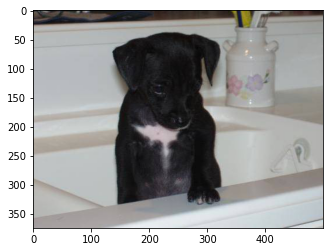

In [ ]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

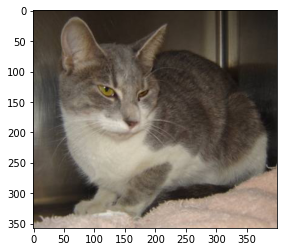

In [ ]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
dog
dog
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

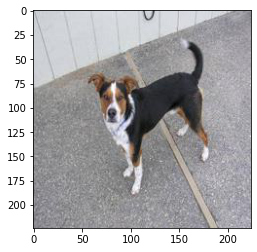

In [ ]:
img = mpimg.imread('/content/image resized/dog.12490.jpg')
imgplt = plt.imshow(img)
plt.show()

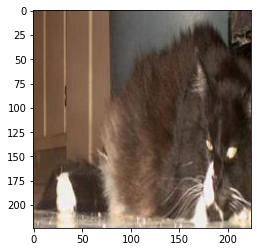

In [ ]:
img = mpimg.imread('/content/image resized/cat.728.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.12309.jpg', 'dog.12490.jpg', 'dog.7546.jpg', 'dog.932.jpg', 'dog.6804.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 1]
2000


In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1007  993]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[103  99 110]
   [102  98 109]
   [100  96 107]
   ...
   [ 31  42  62]
   [ 32  43  63]
   [ 32  43  63]]

  [[114 110 121]
   [113 109 120]
   [112 108 119]
   ...
   [ 32  43  63]
   [ 34  45  65]
   [ 35  46  66]]

  [[118 112 123]
   [118 112 123]
   [117 111 122]
   ...
   [ 33  42  62]
   [ 35  44  64]
   [ 36  45  65]]

  ...

  [[ 79  83 111]
   [ 85  89 117]
   [ 86  90 118]
   ...
   [ 69  62  43]
   [ 66  59  40]
   [ 63  56  37]]

  [[ 86  90 118]
   [ 91  95 123]
   [ 89  93 121]
   ...
   [ 73  66  46]
   [ 73  64  44]
   [ 69  60  40]]

  [[ 96 100 128]
   [ 99 103 131]
   [ 94  98 126]
   ...
   [ 81  74  54]
   [ 82  73  53]
   [ 79  70  50]]]


 [[[191 186 183]
   [173 168 165]
   [219 214 211]
   ...
   [166 160 161]
   [158 152 153]
   [148 142 143]]

  [[199 194 191]
   [178 173 170]
   [209 204 201]
   ...
   [162 156 157]
   [157 151 152]
   [152 146 147]]

  [[208 203 200]
   [186 181 178]
   [196 191 188]
   ...
   [146 140 141]
   [144 138 139]
   [145 139

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.01960784 0.01568627 0.02352941]
   [0.02745098 0.02352941 0.03137255]
   [0.03529412 0.03137255 0.03921569]
   ...
   [0.01960784 0.02352941 0.03921569]
   [0.00392157 0.00784314 0.02352941]
   [0.         0.         0.01568627]]

  [[0.01960784 0.01568627 0.02352941]
   [0.02745098 0.02352941 0.03137255]
   [0.03529412 0.03137255 0.03921569]
   ...
   [0.03137255 0.03529412 0.05098039]
   [0.01960784 0.02352941 0.03921569]
   [0.00784314 0.01176471 0.02745098]]

  [[0.01960784 0.01568627 0.02352941]
   [0.02745098 0.02352941 0.03137255]
   [0.03529412 0.03137255 0.03921569]
   ...
   [0.02352941 0.02745098 0.04313725]
   [0.00784314 0.01176471 0.02745098]
   [0.         0.00392157 0.01960784]]

  ...

  [[0.01960784 0.01568627 0.03137255]
   [0.03137255 0.02745098 0.04313725]
   [0.04313725 0.03921569 0.05490196]
   ...
   [0.03529412 0.03137255 0.06666667]
   [0.01960784 0.01568627 0.05098039]
   [0.01176471 0.00784314 0.04313725]]

  [[0.01960784 0.01568627 0.03137255]
   [0.0

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 70s 1s/step - loss: 0.2206 - acc: 0.9069
Epoch 2/5
50/50 [==============================] - 60s 1s/step - loss: 0.0655 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0485 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0367 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 60s 1s/step - loss: 0.0289 - acc: 0.9937


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.0767 - acc: 0.9775
Test Loss = 0.07668880373239517
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/dog.jpg


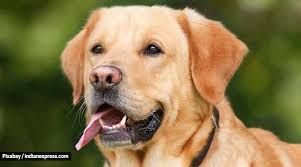

1/1 [==============================] - 1s 722ms/step
[[-5.5549664  4.8028846]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


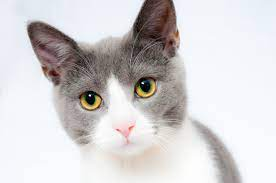

1/1 [==============================] - 0s 67ms/step
[[ 4.5088387 -4.354469 ]]
0
The image represents a Cat


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')